In [2]:
%matplotlib inline

In [3]:
import os, json, csv, copy,matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

In [4]:
#q1
r = os.listdir("data")
r.sort(reverse = True)
r

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [5]:
x = os.listdir("data")
x

['review1.csv',
 'review3.csv',
 'review2.csv',
 'sample_reviews.csv',
 'review5.csv',
 'review1.json',
 'review4.csv',
 'sample_reviews.json',
 'review4.json',
 'review5.json',
 'products.json',
 'review2.json',
 'review3.json']

In [6]:
#q2
data_paths = []

for fname in x:
    data_paths.append(os.path.join("data", fname))
data_paths.sort(reverse = True)
data_paths


['data/sample_reviews.json',
 'data/sample_reviews.csv',
 'data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv',
 'data/products.json']

In [7]:
#q3
csv_list = []
for fname in data_paths:
    if "csv" in fname:
        csv_list.append(fname)

csv_list

['data/sample_reviews.csv',
 'data/review5.csv',
 'data/review4.csv',
 'data/review3.csv',
 'data/review2.csv',
 'data/review1.csv']

In [8]:
#q4
review_list = []
for fname in data_paths:
    if fname.startswith("data/review"):
        review_list.append(fname)
review_list

['data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv']

In [9]:
def json_reader(fname, directory="data"):
    f = open(os.path.join(directory, fname), encoding="utf-8")
    json_str = f.read()
    f.close()

    data = json.loads(json_str)
    return(data)

In [10]:
#q5
d = json_reader("products.json")
d

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [11]:
def csv_reader(fname):
    csv_data = []
    f = open(os.path.join("data", fname), encoding="utf-8")
    reader = csv.DictReader(f)
    for row in reader:
        csv_data.append(row)
        
    return(csv_data)

In [12]:
r1 = csv_reader("review1.csv")
r2 = csv_reader("review2.csv")
r3 = csv_reader("review3.csv")
r4 = csv_reader("review4.csv")
r5 = csv_reader("review5.csv")

allr = r1 + r2 + r3 + r4 + r5
new_r = r1 + r2 + r3 +r5

In [13]:
#q6
def findId(id):
    for r in allr:
        if r["review id"] == str(id):
            return r["review text"]
findId(1410)

'It does what it is suppose to. No problems with it...'

In [14]:
#q7
findId(69899)

'I hate amazon app store. Nothing good in there. The tablet is too slow for what I do... it is good for reading only....'

In [15]:
def findTitle(id):
    for r in allr:
        if r["review id"] == str(id):
            return r["review title"]


In [16]:
#q8
findTitle(28013)

'Perfection'

In [17]:
def getfname(id):
    for r in [r1, r2, r3, r4, r5]:
        for i in r:
            if i["review id"] == id:
                if r == r1:
                    return("review1.csv")
                if r == r2:
                    return("review2.csv")
                if r == r3:
                    return("review3.csv")
                if r == r4:
                    return("review4.csv")
                if r == r5:
                    return("review5.csv")
                

In [18]:
#q9
getfname("28013")

'review3.csv'

In [19]:
#q10
json_reader("sample_reviews.json")

{'10101': ['Mikey123456789', 'B00QFQRELG'],
 '99904': ['diamond', 'B00QFQRELG'],
 '89604': ['Pat91', 'B00QFQRELG'],
 '58704': ['Frank', 'B00QFQRELG'],
 '38104': ['LADYD92', 'B00QFQRELG']}

In [20]:
from collections import namedtuple

Review = namedtuple("Review", ["id", "username", "asin", "title", "text", "rating", "do_recommend", "num_helpful", "date"])

def get_reviews(fname1, fname2):
    list_review = []
    try:
        f = open(os.path.join("data", fname1), encoding="utf-8")
        reader = list(csv.reader(f))
        header = reader[0]
        f = open(os.path.join("data", fname2), encoding="utf-8")
        product_json = json.load(f)
        for row in reader[1:]:
            try:
                temp_list = []
                temp_list.append(int(row[0]))
                temp_list.append(product_json[row[0]][0])
                temp_list.append(product_json[row[0]][1])
                temp_list.append(row[1])
                temp_list.append(row[2])
                temp_list.append(int(row[3]))
                temp_list.append(row[4]== "True")
                temp_list.append(int(row[5]))
                temp_list.append(row[6])
                list_review.append(Review(*temp_list))
            except:
                pass
    except:
        pass
    return(list_review)            

In [21]:
#q11
get_reviews("sample_reviews.csv", "sample_reviews.json")

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [22]:
#q12
get_reviews("review1.csv", "review1.json")[0:10]

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [23]:
#q13
get_reviews("review2.csv", "review2.json")[-10:]

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [24]:
def get_review_object():
    all_reviews = []
    for i in range(1, 6):
        csv_file = "review" + str(i) + ".csv"
        json_file = "review" + str(i) + ".json"
        all_reviews.extend(get_reviews(csv_file, json_file))
    return all_reviews
all_reviews = get_review_object()
all_reviews

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [25]:
#q14
def get_review_id(id):
    id_review = None
    for review in all_reviews:
        if(review.id == id):
            id_review = review
    return id_review
get_review_id(84713)

Review(id=84713, username='mmolly1', asin='B01AHB9CN2', title='Great product', text='This product is very user friendly and it is very lightweight', rating=5, do_recommend=True, num_helpful=0, date='2017-01-08')

In [26]:
#q15
get_review_id(42931)

Review(id=42931, username='tbistone', asin='B01BH83OOM', title='Amazing', text='I literally use this thing every single day. Love it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-20')

In [27]:
#q16
w = all_reviews
w.sort()
w[:10]

[Review(id=74, username='Wayne', asin='B01AHB9CN2', title='Kindle upgrade', text='Gave this to my wife for Christmas. Upgraded from the original Kindle. She thoroughly enjoys it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-31'),
 Review(id=82, username='KKLORRAINE', asin='B01AHB9CN2', title='Good', text='Great for reading and Netflix. Fits nice in purse. Good price.', rating=4, do_recommend=True, num_helpful=0, date='2017-04-07'),
 Review(id=110, username='nell', asin='B00IOY8XWQ', title='I love it', text='Prefect for all reading conditions and environments. I take it everywhere.', rating=5, do_recommend=True, num_helpful=0, date='2016-07-09'),
 Review(id=122, username='apple21man', asin='B01BH83OOM', title='A great assistant', text='It works well it takes time for it to know your vocabulary', rating=5, do_recommend=True, num_helpful=0, date='2017-01-23'),
 Review(id=247, username='rockydon1', asin='B018Y229OU', title='great', text='The Kindle fire is a great product. W

In [28]:
#q17
def output_number():
    count = 0
    for i in all_reviews:
        if json_reader("products.json")[i.asin] == "Amazon Tap Smart Assistant Alexa enabled (black) Brand New":
            count += 1
    return(count)
output_number()

165

In [29]:
#q18 
def output_number2():
    count = 0 
    for i in all_reviews:
        if json_reader("products.json")[i.asin] == "All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black":
            count += 1
    return(count)
output_number2()

12

In [30]:
#q19
sneak = {}
for i in all_reviews:
    if i[2] not in sneak:
        sneak[i[2]] = 0
    else:
        sneak[i[2]] += 1

highest = 0 
for i in sneak:
    if sneak[i] > highest:
        highest = sneak[i]
named_dict = dict(sorted(sneak.items(), key = lambda x : x[1], reverse=True)[:1])

def q_19():
    for i in d:
        for j in named_dict:
            if i == j:
                return d[j]
q_19()        

'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'

In [31]:
#q20
e = q_19() 
def q_20():
    for i in d:
        if d[i] == e:
            return i
highest = 0 

for i in all_reviews:
    if i[2] == q_20():
        if i[7] > highest: 
            highest = i[7]
def return_most_helpful():            
    for i in all_reviews:
        if i[7] == 20:
            return get_review_id(i[0])
return_most_helpful()

Review(id=85969, username='Beninkc', asin='B018Y229OU', title='5 star device crippled by amazon', text='This device would be the best possible tablet for the money if it had Google Play. However Amazon chose to block access to it. This took their well made tablet with a beautiful screen and great performance from an amazing value to a waste of money. This is my last amazon branded product.If you use a lot of apps or want specific apps shop for another device.', rating=1, do_recommend=False, num_helpful=20, date='2016-02-14')

In [32]:
#q21
username_list = []
for i in all_reviews:
    if i[1] not in username_list:
        username_list.append(i[1])
username_list
len(username_list)

3798

In [33]:
usernames_list = []
for i in all_reviews:
    usernames_list.append(i[1]) 

In [34]:
#q22
counts_ = {}
for name in usernames_list:
    if not name in counts_:
        counts_[name] = 0
    if name in counts_:
        counts_[name] += 1

dict(sorted(counts_.items(), key = lambda x : x[1], reverse=True)[:30])

{'Dave': 5,
 'Steve': 4,
 'Mike': 4,
 '1234': 4,
 'Susan': 4,
 'Angie': 4,
 'Chris': 4,
 'Missy': 4,
 'Pete': 3,
 'Anonymous': 3,
 'Josh': 3,
 'Charles': 3,
 'Rick': 3,
 'Dani': 3,
 'mike': 3,
 'Bill': 3,
 'John': 3,
 'Jojo': 3,
 'Kindle': 3,
 'Bubba': 3,
 'kcladyz': 3,
 'Frank': 3,
 'Grandma': 3,
 'Mimi': 3,
 'Richard': 3,
 'Manny': 3,
 'Susie': 3,
 'Charlie': 3,
 'Michael': 3,
 'David': 3}

In [35]:
reviews ={}
for i in all_reviews:
    if i[1] not in reviews.keys():
        reviews[i[1]] = [i[7]]
    else:
        reviews[i[1]] += [i[7]]        
new_ddd = {}
for j in reviews:
    if len(reviews[j]) > 1:
        times = []
        summed = sum(reviews[j])
        times.append(summed)
        new_ddd[j] = times
    else: 
        new_ddd[j] = reviews[j]
        
new_ddd
dict(sorted(new_ddd.items(), key = lambda x : x[1], reverse=True))

{'Earthdog': [27],
 'Beninkc': [20],
 'Ellen': [10],
 'CarlosEA': [10],
 'Stuartc': [8],
 'safissad': [8],
 'LadyEsco702': [8],
 'Deejay': [8],
 'Junior': [7],
 'Roberto002007': [7],
 'EricO': [7],
 'fenton': [6],
 'mysixpack': [6],
 'Rodge': [6],
 'Dick': [5],
 'AshT': [5],
 'iMax': [5],
 'trouble': [5],
 'stephfasc22': [5],
 'Karch': [5],
 'TerrieT': [5],
 'Mark': [5],
 'FrankW': [5],
 '1Briansapp': [5],
 'Quasimodo': [5],
 'Kime': [5],
 'geoshox': [4],
 'Silvia': [4],
 'UR2SWEET': [4],
 'Joanne': [4],
 'Georgegeorgegeorge': [4],
 'Ontario': [4],
 'Madskillsmike': [4],
 'Peaches': [4],
 'TheKnight': [4],
 'deadman197': [4],
 'tre48': [4],
 'Jerry': [4],
 'jeztur2003': [4],
 'SPKarthik': [4],
 'Brisco': [4],
 'isela': [3],
 'Wolfpack': [3],
 'Dngrmonkey': [3],
 'dutch': [3],
 'Mike1243': [3],
 'Amber': [3],
 'inkcart': [3],
 'MrRobert': [3],
 'Noctoynal': [3],
 'Donpc': [3],
 'Miller': [3],
 'Pannow': [3],
 'Henry': [3],
 'Jmstott87': [3],
 'buddy': [3],
 'Mds43': [3],
 'ShaneT': [3],

In [36]:
#q23
last_d = {}
for i in new_ddd:
    p = new_ddd[i]
    last_d[i] = p.pop()

final_d = {}
for i in last_d:
    if last_d[i] >= 5:        
        final_d[i] = last_d[i]
final_d

{'Ellen': 10,
 'Earthdog': 27,
 'fenton': 6,
 'Dick': 5,
 'Junior': 7,
 'AshT': 5,
 'Stuartc': 8,
 'safissad': 8,
 'iMax': 5,
 'trouble': 5,
 'Roberto002007': 7,
 'EricO': 7,
 'stephfasc22': 5,
 'LadyEsco702': 8,
 'Karch': 5,
 'TerrieT': 5,
 'mysixpack': 6,
 'Mark': 5,
 'Rodge': 6,
 'Deejay': 8,
 'FrankW': 5,
 'Beninkc': 20,
 'CarlosEA': 10,
 '1Briansapp': 5,
 'Quasimodo': 5,
 'Kime': 5}

In [37]:
average_rating ={}
for i in all_reviews:
    if i[2] not in average_rating.keys():
        average_rating[i[2]] = [i[5]]
    else:
        average_rating[i[2]] += [i[5]]        
average_rating

no_dups_ratings = {}
for j in average_rating:
    if len(average_rating[j]) > 1:
        combined = []
        summed = sum(average_rating[j])
        value = (summed/len(average_rating[j]))
        combined.append(value)
        no_dups_ratings[j] = combined
    else: 
        no_dups_ratings[j] = average_rating[j]
        
last_rating_d = {}
for i in no_dups_ratings:
    avg_rating = no_dups_ratings[i]
    last_rating_d[i] = avg_rating.pop()
last_rating_d

{'B01AHB9CN2': 4.6,
 'B00IOY8XWQ': 4.666666666666667,
 'B01BH83OOM': 4.6909090909090905,
 'B018Y229OU': 4.490408673894913,
 'B00ZV9PXP2': 4.590163934426229,
 'B01AHB9C1E': 3.8333333333333335,
 'B00QFQRELG': 4.7272727272727275,
 'B018Y226XO': 4.603448275862069,
 'B01AHB9CYG': 4.574468085106383,
 'B01ACEKAJY': 4.583333333333333,
 'B00VINDBJK': 4.866666666666666,
 'B0751RGYJV': 5,
 'B0752151W6': 5}

In [38]:
#q24
res = dict((v,k) for k,v in d.items())

new_d = {}
for i, j in d.items():
    for a, b in last_rating_d.items():
        if i == a:
            new_d[j] = b
new_d

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,
 'Al

In [39]:
average_rating ={}
for i in all_reviews:
    if i[2] not in average_rating.keys():
        average_rating[i[2]] = [i[5]]
    else:
        average_rating[i[2]] += [i[5]]        
average_rating

length = []

no_dups_ratings = {}
for j in average_rating:
    if len(average_rating[j]) >= 0:
        combined = []
        summed = sum(average_rating[j]) 
        sum_1 = summed-1
        value = (sum_1/len(average_rating[j]))
        length.append(len(average_rating[j]))
        combined.append(value)
        no_dups_ratings[j] = combined
    else: 
        no_dups_ratings[j] = average_rating[j]
ser = Series(length)
ser -= 1
lp = list(ser)
lp
no_dups_ratings

{'B01AHB9CN2': [4.598974358974359],
 'B00IOY8XWQ': [4.658730158730159],
 'B01BH83OOM': [4.684848484848485],
 'B018Y229OU': [4.489991659716431],
 'B00ZV9PXP2': [4.573770491803279],
 'B01AHB9C1E': [3.6666666666666665],
 'B00QFQRELG': [4.636363636363637],
 'B018Y226XO': [4.597701149425287],
 'B01AHB9CYG': [4.553191489361702],
 'B01ACEKAJY': [4.5],
 'B00VINDBJK': [4.8],
 'B0751RGYJV': [4.0],
 'B0752151W6': [4.0]}

In [40]:
_average_rating ={}
for i in all_reviews:
    if i[2] not in _average_rating.keys():
        _average_rating[i[2]] = [i[5]]
    else:
        _average_rating[i[2]] += [i[5]]        
_average_rating

_no_dups_ratings = {}
for j in _average_rating:
    if len(_average_rating[j]) >= 0:
        combined = []
        length = len(_average_rating[j])
        _length = length 
        combined.append(_length)
        _no_dups_ratings[j] = combined
    else: 
        _no_dups_ratings[j] = _average_rating[j]
        
_last_rating_d = {}
for i in _no_dups_ratings:
    avg_rating = _no_dups_ratings[i]
    _last_rating_d[i] = avg_rating.pop()
_last_rating_d

{'B01AHB9CN2': 975,
 'B00IOY8XWQ': 126,
 'B01BH83OOM': 165,
 'B018Y229OU': 2398,
 'B00ZV9PXP2': 61,
 'B01AHB9C1E': 6,
 'B00QFQRELG': 11,
 'B018Y226XO': 174,
 'B01AHB9CYG': 47,
 'B01ACEKAJY': 12,
 'B00VINDBJK': 15,
 'B0751RGYJV': 1,
 'B0752151W6': 1}

In [41]:
last_rating_d

{'B01AHB9CN2': 4.6,
 'B00IOY8XWQ': 4.666666666666667,
 'B01BH83OOM': 4.6909090909090905,
 'B018Y229OU': 4.490408673894913,
 'B00ZV9PXP2': 4.590163934426229,
 'B01AHB9C1E': 3.8333333333333335,
 'B00QFQRELG': 4.7272727272727275,
 'B018Y226XO': 4.603448275862069,
 'B01AHB9CYG': 4.574468085106383,
 'B01ACEKAJY': 4.583333333333333,
 'B00VINDBJK': 4.866666666666666,
 'B0751RGYJV': 5,
 'B0752151W6': 5}

In [42]:
_last_dic = {}
for i, j in _last_rating_d.items():
    for a, b in last_rating_d.items():
        if i == a:
            _last_dic[j] = b
_last_dic          

{975: 4.6,
 126: 4.666666666666667,
 165: 4.6909090909090905,
 2398: 4.490408673894913,
 61: 4.590163934426229,
 6: 3.8333333333333335,
 11: 4.7272727272727275,
 174: 4.603448275862069,
 47: 4.574468085106383,
 12: 4.583333333333333,
 15: 4.866666666666666,
 1: 5}

In [43]:
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [44]:
outlier_dic = {}
for i in _last_dic:
    if i < 1500:
        outlier_dic[i] = _last_dic[i]
outlier_dic

{975: 4.6,
 126: 4.666666666666667,
 165: 4.6909090909090905,
 61: 4.590163934426229,
 6: 3.8333333333333335,
 11: 4.7272727272727275,
 174: 4.603448275862069,
 47: 4.574468085106383,
 12: 4.583333333333333,
 15: 4.866666666666666,
 1: 5}

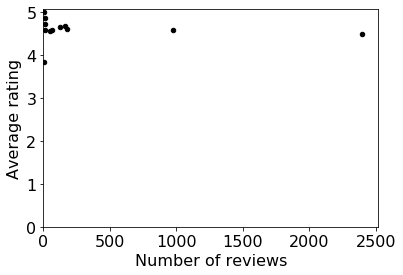

In [45]:
#q25
x = []
y = []
for k , v in _last_dic.items():
    x.append(k)
    y.append(v)

scatter(x, y, xlabel="Number of reviews", ylabel="Average rating")

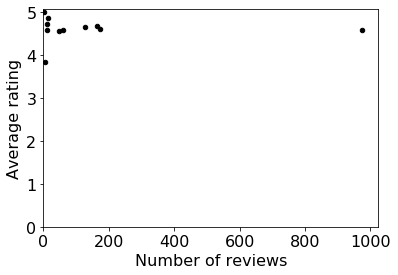

In [46]:
#q26
outlier_x = []
outlier_y = []
for k , v in outlier_dic.items():
    outlier_x.append(k)
    outlier_y.append(v)

scatter(outlier_x, outlier_y, xlabel="Number of reviews", ylabel="Average rating")

In [47]:
def bucketize():
    one = []
    two = []
    three = []
    four = []
    five = []
    for i in all_reviews:
        if i[5] == 1:
            one.append(i[5])
        elif i[5] == 2:
            two.append(i[5])
        elif i[5] == 3:
            three.append(i[5])
        elif i[5] == 4:
            four.append(i[5])
        elif i[5] == 5:
            five.append(i[5])
    return (one,two,three,four,five)

x = bucketize()
length_list_1 = len(x[0])
length_list_2 = len(x[1])
length_list_3 = len(x[2])
length_list_4 = len(x[3])
length_list_5 = len(x[4])

In [48]:
one_text = []
for i in all_reviews:
    one_text.append(len(i[4]))
one_text
one_total = 0 
for i in one_text:
    one_total += i
one_total

386744

In [49]:
def bucketize():
    one = []
    two = []
    three = []
    four = []
    five = []
    one_text = []
    two_text = []
    three_text = []
    four_text = []
    five_text = []
    for i in all_reviews:
        if i[5] == 1:
            one_total = 0
            one.append(i[5])
            one_text.append(len(i[4]))
            for j in one_text:
                one_total += j
        elif i[5] == 2:
            two_total = 0
            two.append(i[5])
            two_text.append(len(i[4]))
            for k in two_text:
                two_total += k
        elif i[5] == 3:
            three_total = 0
            three.append(i[5])
            three_text.append(len(i[4])) 
            for l in three_text:
                three_total += l
        elif i[5] == 4:
            four_total = 0
            four.append(i[5])
            four_text.append(len(i[4])) 
            for m in four_text:
                four_total += m   
        elif i[5] == 5:
            five_total = 0
            five.append(i[5])
            five_text.append(len(i[4])) 
            for n in five_text:
                five_total += n    
    len_one = len(one)
    len_two = len(two)
    len_three = len(three)
    len_four = len(four)
    len_five = len(five) 
    lst = []
    avg_one = (one_total/len_one)
    lst.append(avg_one)
    avg_two = (two_total/len_two)
    lst.append(avg_two)
    avg_three = (three_total/len_three)
    lst.append(avg_three)
    avg_four = (four_total/len_four)
    lst.append(avg_four)
    avg_five = (five_total/len_five)
    lst.append(avg_five)
    q_27_dic = {}
    for i in range(1,6):
        q_27_dic[i] = 0
        for j in range(5):
            q_27_dic[j+1] = lst[j]
    return q_27_dic
            
bucketize()   

{1: 145.23684210526315,
 2: 105.32142857142857,
 3: 104.64921465968587,
 4: 98.29802955665025,
 5: 94.77989670242351}

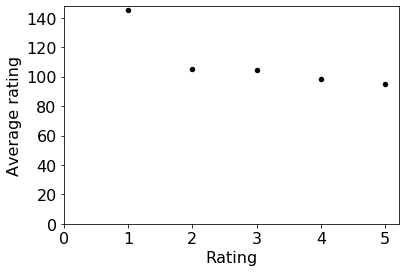

In [50]:
#q27
funct = bucketize()
x = []
y = []
for k , v in funct.items():
    x.append(k)
    y.append(v)

scatter(x, y, xlabel="Rating", ylabel="Average rating")

In [51]:
#q28 rating (x) [1-5] and percantage of helpful rv=eview (y - values)
def bucketize_percent():
    one = []
    two = []
    three = []
    four = []
    five = []
    o = 0
    tw = 0
    thr = 0
    fou = 0
    fiv = 0
    for i in all_reviews:
        if i[5] == 1:
            o += 1
            if i[7] > 0:
                one.append(i[7])
        elif i[5] == 2:
            tw += 1
            if i[7] > 0:
                two.append(i[7])
        elif i[5] == 3:
            thr += 1
            if i[7] >0:
                three.append(i[7])  
        elif i[5] == 4:
            fou += 1
            if i[7] >0:
                four.append(i[7])      
        elif i[5] == 5:
            fiv += 1
            if i[7] >0:
                five.append(i[7])   
        
    s1 = len(one)
    s2 = len(two)
    s3 = len(three)
    s4 = len(four)
    s5 = len(five)
    lst = []
    avg_one = (s1/o)
    lst.append(avg_one)
    avg_two = (s2/tw)
    lst.append(avg_two)
    avg_three = (s3/thr)
    lst.append(avg_three)
    avg_four = (s4/fou)
    lst.append(avg_four)
    avg_five = (s5/fiv)
    lst.append(avg_five)
    q_27_dic = {}
    for i in range(1,6):
        q_27_dic[i] = 0
        for j in range(5):
            q_27_dic[j+1] = lst[j]
    return q_27_dic
bucketize_percent()   


{1: 0.39473684210526316,
 2: 0.21428571428571427,
 3: 0.09424083769633508,
 4: 0.1206896551724138,
 5: 0.11481922924116011}

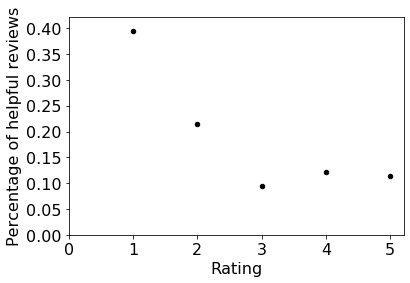

In [52]:
#q28
function_percent = bucketize_percent()
x = []
y = []
for k , v in function_percent.items():
    x.append(k)
    y.append(v)
scatter(x, y, xlabel="Rating", ylabel="Percentage of helpful reviews")

In [53]:
#q29
def bucketize_reviews():
    total = 0
    true_list = []
    for i in all_reviews:
        if i[6] == True:
            total = total + 1 
            true_list.append(i[5])
    true_list_total = 0 
    for j in true_list:
        true_list_total += j 
    return (true_list_total/total)
        
bucketize_reviews()   

4.607549120992761

In [54]:
def bucketize_rec():
    o = 0
    _o = 0 
    tw = 0
    _tw = 0 
    thr = 0
    _thr = 0 
    fou = 0
    _fou = 0 
    fiv = 0
    _fiv = 0 
    for i in all_reviews: 
        if i[5] == 1:
            o += 1
            if i[6] == True:
                _o += 1    
        elif i[5] == 2:
            tw += 1
            if i[6] == True:
                _tw += 1 
        elif i[5] == 3:
            thr += 1
            if i[6] == True:
                _thr += 1   
        elif i[5] == 4:
            fou += 1
            if i[6] == True:
                _fou += 1    
        elif i[5] == 5:
            fiv += 1
            if i[6] == True:
                _fiv += 1 
    percentage_list = []
    p1 = _o / o
    percentage_list.append(p1)
    p2 = _tw / tw
    percentage_list.append(p2)
    p3 = _thr / thr
    percentage_list.append(p3)
    p4 = _fou / fou
    percentage_list.append(p4)
    p5 = _fiv / fiv
    percentage_list.append(p5)

        
    percent_recommended = {}
    for i in range(1,6):
        for j in range(5):
            percent_recommended[j+1] = percentage_list[j]
    return percent_recommended
bucketize_rec()

{1: 0.10526315789473684,
 2: 0.14285714285714285,
 3: 0.743455497382199,
 4: 0.9901477832512315,
 5: 0.9980135081446166}

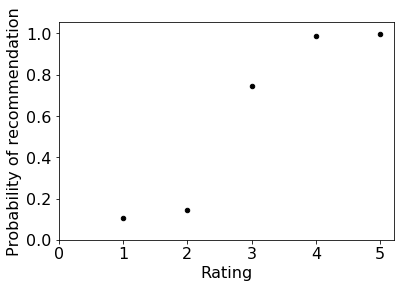

In [55]:
#q30
recommended = bucketize_rec()
x = []
y = []
for k , v in recommended.items():
    x.append(k)
    y.append(v)
scatter(x, y, xlabel="Rating", ylabel="Probability of recommendation")

In [56]:
tup = tuple(all_reviews)

In [57]:
#q31 Find out which words appear most w/ rating 5. Has to appear over 100 too 
all_words = {}
count = 0 
used_1000_times = {}
for a_review in tup:
    if a_review.rating == 5:
        ### Need to split 
        for word in a_review.text.lower().split(" "):
            if word in all_words:
                all_words[word] = all_words[word] + 1 
            else:
                all_words[word] = 1
for word in all_words:
    if all_words[word] > 1000:
        used_1000_times[word] = all_words[word] 
used_1000_times

{'this': 1016,
 'to': 1442,
 'my': 1146,
 'for': 1800,
 'the': 1740,
 'and': 1818,
 'i': 1317,
 'it': 1286,
 'a': 1134}

In [58]:
#q32
all_words = {}
count = 0 
used_100_times = {}
for a_review in tup:
    if a_review.rating == 5:
        ### Need to split 
        for word in a_review.title.lower().split(" "):
            if word in all_words:
                all_words[word] = all_words[word] + 1 
            else:
                all_words[word] = 1
for word in all_words:
    if all_words[word] >= 100:
        used_100_times[word] = all_words[word] 
used_100_times

{'kindle': 142,
 'love': 158,
 'it': 137,
 'a': 143,
 'great': 1093,
 'the': 231,
 'tablet': 681,
 'good': 212,
 'for': 617,
 'awesome': 108,
 'kids': 132,
 'gift': 105,
 'fire': 104,
 'price': 149,
 'product': 179,
 'my': 138,
 'to': 106}

In [59]:
#q33
all_words = {}
count = 0 
used_1_times = {}
for a_review in tup:
    if a_review.rating == 1:
        ### Need to split 
        for word in a_review.title.lower().split(" "):
            if word in all_words:
                all_words[word] = all_words[word] + 1 
            else:
                all_words[word] = 1
                
for word in all_words:
    if all_words[word] > 1:
        used_1_times[word] = all_words[word] 
used_1_times

{'poor': 2,
 'tablet': 4,
 'a': 5,
 'great': 2,
 'very': 3,
 'disappointed': 2,
 'use': 2,
 'amazon': 5,
 'not': 8,
 'good': 2,
 '5': 2,
 'for': 2,
 'with': 2,
 'work': 2,
 'really': 2,
 'to': 2,
 'and': 2,
 'kindle': 2,
 'does': 2}

In [60]:
#q34
all_words = {}
count = 0 
used_10_times = {}
for a_review in tup:
    if a_review.rating == 3:
        ### Need to split 
        for word in a_review.title.lower().split(" "):
            if word in all_words:
                all_words[word] = all_words[word] + 1 
            else:
                all_words[word] = 1
                
for word in all_words:
    if all_words[word] > 10:
        used_10_times[word] = all_words[word] 
used_10_times

{'great': 37,
 'for': 60,
 'price': 18,
 'ok': 18,
 'tablet': 51,
 'the': 18,
 'good': 42,
 'not': 13,
 'a': 17}

In [61]:
y = os.listdir("broken_file/rating5/helpful")
y

['helpful.json']

In [62]:
helpful_paths = []
for fname in y:
    helpful_paths.append(os.path.join("broken_file/rating5/helpful", fname))
helpful_paths.sort(reverse=True)
helpful_paths

['broken_file/rating5/helpful/helpful.json']

In [63]:
def get_files(directory):
    recursion_lst = []
    for path in os.listdir(directory):
        if '.' in path and 'DS' not in path:
            recursion_lst.append(os.path.join(directory,path))
        elif 'DS' not in path:
            recursion_lst.extend(get_files(os.path.join(directory,path)))
            
    return recursion_lst

In [64]:
#q35
get_files("broken_file/rating5/helpful")

['broken_file/rating5/helpful/helpful.json']

In [65]:
#q36 
p = get_files("broken_file/rating4")
p.sort(reverse=True)
p

['broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json']

In [66]:
#q37
s = get_files("broken_file")
s.sort(reverse=True)
s

['broken_file/rating5/others.json',
 'broken_file/rating5/helpful/helpful.json',
 'broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json',
 'broken_file/rating3/others/others.json',
 'broken_file/rating3/long/long.json',
 'broken_file/others.json']